In [10]:
import nibabel as nib
import numpy as np
import torch
import matplotlib.pyplot as plt

# 1. Proxy 불러오기
mri = nib.load(r'results\miccai2008-mslesions-flair-20220126-133112\test\test01_02_KIT.nii')
original_mri = nib.load(r'datasets\MICCAI_2008_MS_Lesions\testdata_website\test01\preprocessed\test01_01_flair_pp.nii')

# 2. Header 불러오기
print(mri.header)
# print(original_mri.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 181 217 181   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [-1.  0.  0.  0.]
srow_y          : [

In [11]:
flair = mri.get_fdata()
print(type(flair))
print(flair.shape)
print(np.unique(flair))

<class 'numpy.memmap'>
(181, 217, 181)
[0. 1.]


# Plotting single images

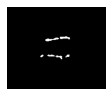

In [12]:
# 1. figure와 axes 초기화
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)

# 2. plot slices of volume
flair_slice = flair[:,:,100]
ax1.imshow(flair_slice, cmap='gray')

# 3. edit axes and display figure
ax1.axis('off')
plt.show()

# Plotting multiple images

In [ ]:
# 1. initialize figure and axes
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(40,10))

slice_indices = [i * mri.shape[2]//10 for i in range(10)]
print(slice_indices)

for i in range(10):
    flair_slice = flair[:,:,slice_indices[i]]
    axes[0][i].imshow(flair_slice,cmap='gray')
    axes[0][i].axis('off')

for i in range(10):
    mask1_slice = mask1[:,:,slice_indices[i]]
    axes[1][i].imshow(mask1_slice,cmap='gray')
    axes[1][i].axis('off')

for i in range(10):
    mask2_slice = mask2[:,:,slice_indices[i]]
    axes[2][i].imshow(mask2_slice,cmap='gray')
    axes[2][i].axis('off')

plt.show()

In [ ]:
import glob

paths = glob.glob(r'C:\Users\VIP444\Documents\Github\MS-Lesions-Segmentation\MS-Lesions-Pytorch\datasets\MICCAI_2008_MS_Lesions\training\*\*\*mask1.nii.gz')
print(len(paths))

flair_paths = sorted(glob.glob(r'C:\Users\VIP444\Documents\Github\MS-Lesions-Segmentation\MS-Lesions-Pytorch\datasets\MICCAI_2008_MS_Lesions/training/*/*/*flair_pp*.nii.gz'))
print(len(flair_paths))

In [ ]:
import torchio as tio
import torchvision.transforms as T
import torch

oneOf = tio.OneOf({
    tio.transforms.RandomFlip(axes=(0,)) : 0.5,
    tio.transforms.RandomElasticDeformation() : 1,
    tio.transforms.RandomAffine() : 1,
    tio.transforms.RandomNoise() : 0.2,
    tio.transforms.RandomGamma() : 0.2
})

tflair = torch.FloatTensor(flair)
tlabel1 = torch.FloatTensor(mask1)
tflair = tflair.unsqueeze(0)
tlabel1 =tlabel1.unsqueeze(0)



transform = tio.Compose([
    # tio.Resample(4),
    # tio.RandomMotion(p=0.2),
    # tio.RandomBiasField(p=0.3),
    # tio.RandomNoise(p=0.5),
    tio.RandomFlip(axes=(0,)),
    tio.RandomAffine(),
    # tio.ZNormalization()
])

tlabel1= transform(tlabel1)

np.unique(tlabel1)


In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2)

ax[0].imshow(flair[:,:,80])
ax[1].imshow(pp_flair[0][:,:,80])